In [1]:
#load dataset
from datasets import load_dataset

In [3]:
cifar_100 = load_dataset("uoft-cs/cifar100")

README.md: 0.00B [00:00, ?B/s]

c:\Users\ngtie\.conda\envs\MAGI\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\ngtie\.cache\huggingface\hub\datasets--uoft-cs--cifar100. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download

0000.parquet:   0%|          | 0.00/119M [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


0000.parquet:   0%|          | 0.00/23.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [6]:
cifar_100

DatasetDict({
    train: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'fine_label', 'coarse_label'],
        num_rows: 10000
    })
})

In [ ]:
#fine_id to label
id2labels = {
    0: "apple",
    1: "aquarium_fish",
    2: "baby",
    3: "bear",
    4: "beaver",
    5: "bed",
    6: "bee",
    7: "beetle",
    8: "bicycle",
    9: "bottle",
    10: "bowl",
    11: "boy",
    12: "bridge",
    13: "bus",
    14: "butterfly",
    15: "camel",
    16: "can",
    17: "castle",
    18: "caterpillar",
    19: "cattle",
    20: "chair",
    21: "chimpanzee",
    22: "clock",
    23: "cloud",
    24: "cockroach",
    25: "couch",
    26: "cra",   # (this looks like a typo? maybe "crab"?)
    27: "crocodile",
    28: "cup",
    29: "dinosaur",
    30: "dolphin",
    31: "elephant",
    32: "flatfish",
    33: "forest",
    34: "fox",
    35: "girl",
    36: "hamster",
    37: "house",
    38: "kangaroo",
    39: "keyboard",
    40: "lamp",
    41: "lawn_mower",
    42: "leopard",
    43: "lion",
    44: "lizard",
    45: "lobster",
    46: "man",
    47: "maple_tree",
    48: "motorcycle",
    49: "mountain",
    50: "mouse",
    51: "mushroom",
    52: "oak_tree",
    53: "orange",
    54: "orchid",
    55: "otter",
    56: "palm_tree",
    57: "pear",
    58: "pickup_truck",
    59: "pine_tree",
    60: "plain",
    61: "plate",
    62: "poppy",
    63: "porcupine",
    64: "possum",
    65: "rabbit",
    66: "raccoon",
    67: "ray",
    68: "road",
    69: "rocket",
    70: "rose",
    71: "sea",
    72: "seal",
    73: "shark",
    74: "shrew",
    75: "skunk",
    76: "skyscraper",
    77: "snail",
    78: "snake",
    79: "spider",
    80: "squirrel",
    81: "streetcar",
    82: "sunflower",
    83: "sweet_pepper",
    84: "table",
    85: "tank",
    86: "telephone",
    87: "television",
    88: "tiger",
    89: "tractor",
    90: "train",
    91: "trout",
    92: "tulip",
    93: "turtle",
    94: "wardrobe",
    95: "whale",
    96: "willow_tree",
    97: "wolf",
    98: "woman",
    99: "worm"
}


In [26]:
#coarse_id to label
coarse_id2labels = {
    0: "aquatic_mammals",
    1: "fish",
    2: "flowers",
    3: "food_containers",
    4: "fruit_and_vegetables",
    5: "household_electrical_devices",
    6: "household_furniture",
    7: "insects",
    8: "large_carnivores",
    9: "large_man-made_outdoor_things",
    10: "large_natural_outdoor_scenes",
    11: "large_omnivores_and_herbivores",
    12: "medium_mammals",
    13: "non-insect_invertebrates",
    14: "people",
    15: "reptiles",
    16: "small_mammals",
    17: "trees",
    18: "vehicles_1",
    19: "vehicles_2"
}


In [11]:
#split dataset into train and test

train_set = cifar_100['train']
test_set = cifar_100['test']

#print sample

print("train Sample: " , train_set[0])
print("test sample: " , test_set[0])

train Sample:  {'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x13E9D9EE1A0>, 'fine_label': 19, 'coarse_label': 11}
test sample:  {'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x13E9D9EEF50>, 'fine_label': 49, 'coarse_label': 10}


Text(0.5, 1.0, "('cattle', ', ', 'large_omnivores_and_herbivores')")

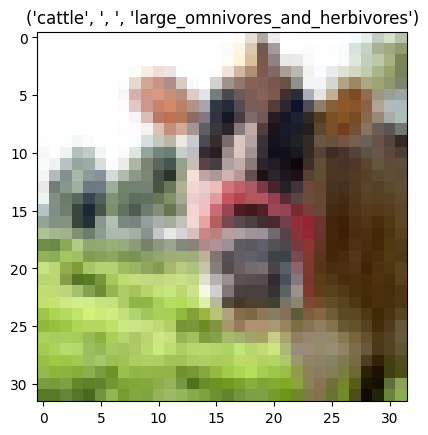

In [28]:
#dataset visualization

import matplotlib.pyplot as plt

image = train_set[0].get('img')
fine_id = int(train_set[0].get('fine_label'))
coarse_id = int(train_set[0].get('coarse_label'))
fine_label = id2labels[fine_id]
coarse_label = coarse_id2labels[coarse_id]


plt.imshow(image)
plt.title((fine_label, ", " , coarse_label))

In [54]:
#plot data in batch of id and coarse id
import matplotlib.pyplot as plt

def plot_image(number_of_image):
    fine_labels = cifar_100["train"].features["fine_label"].names
    fig, axes = plt.subplots(1, number_of_image, figsize=(20, 2))

    for i, ax in enumerate(axes):
        example =cifar_100['train'][i]
        
        img = example["img"]
        label = fine_labels[example["fine_label"]]
        
        ax.imshow(img)
        ax.set_title(label, fontsize=8)
        ax.axis("off")

    plt.tight_layout()
    plt.show()
    return

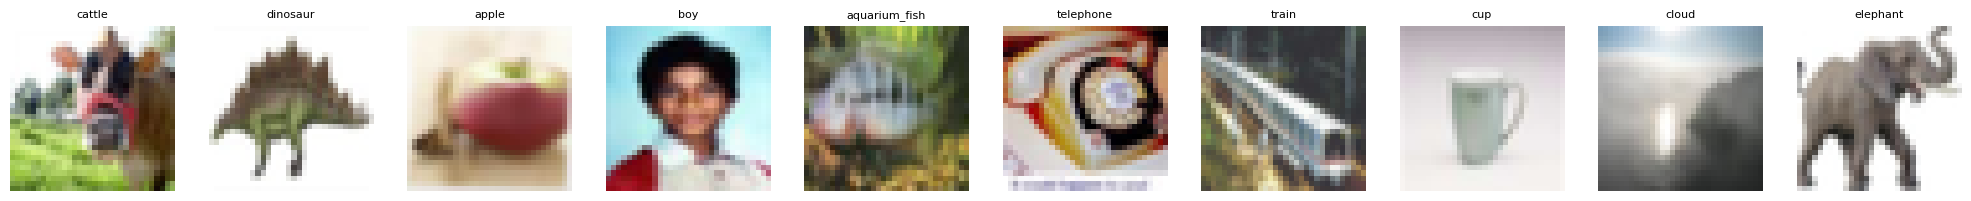

In [55]:
plot_image(10)

In [ ]:
#Deep EDA section 